# fractaL - reinstating the data to ecosystem
## IPython, Sonify and More Audification Prototypes.

This is a notebook with the first tests for fractaL's sound prototyping.
Here you find early tests using some libraries for sonification. From noise-like to MIDI.






### Adding and Importing Libraries Before Start

In [27]:
from IPython.display import Audio 

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as datetime
import sys , os
%matplotlib inline

## Using IPython and NumPy

Ipython is an  


First we import **Audio** from **IPython**, then **NumPy**. These will make possible to not only generate sound, but work with numbers and further datasets.

The next two examples we can see the operations using **NumPy**, after the sound output using **Audio**

The first code modulates a 440 Hz carrier signal with a 520 Hz modulation signal. The modulation fignal (frequence modulation - fm) is the basis of FM radio and of FM synthesis.

In [28]:
import numpy

fs = 44100 # sampling frequency, Hz
fc = 440  # carrier frequency, Hz
fm = 520  # modulation frequency, Hz

T = 19.5 # seconds
twopi = 2*numpy.pi

t = numpy.linspace(0, T, int(T*fs), endpoint=False) # time variable

# Produce ramp from 0 to 1

beta = numpy.linspace(0, 5, int(T*fs))

output = numpy.sin(twopi*fc*t + beta*numpy.sin(twopi*fm*t))

from IPython.display import Audio

Audio(output, rate=fs)

## Using IPython and NumPy


In [29]:
from IPython.display import Audio 

import numpy as np

def waveform(freq,sec=30,sample_rate=42100):
    t = np.linspace(0,sec,sample_rate*sec)
    return(np.sin(np.pi*freq*t))

scale = [440, 493.88, 523.25, 587.33, 659.25, 698.46, 783.99, 880.00]
sample_rate = 52100

Audio(waveform(940,sec=30),rate=sample_rate) #autoplay default is false

## Superposition

In this case we use another sound called **chord** combined to the previous one.

In [30]:
sec = 15
chord = waveform(5, sec) # silence

for note in scale:
    chord += waveform(note, sec)
    
Audio(chord,rate=sample_rate)


## Using SciPy
For exporting wav files, we can use **Scipy**. For this example we use a random sound generation.

In [31]:
import numpy as np
from scipy.io.wavfile import write
from IPython.display import Audio

data = np.random.uniform(-2,231,23100) # 44100 random samples between -1 and 1
scaled = np.int16(data/np.max(np.abs(data)) * 2767)

Audio(scaled,rate=23100)
#write('test.wav', 44100, scaled)

## Integrative Approach


So far we have seen only data and sound. The next code shows how to bring to live graphs and sounds.
It is the first step here to use data synthesizing an instrument sound.

### Using MIDI
A musical instrument digital interface is a standard that makes possible any MIDI-compatible device to connect to any other MIDI-compatible sequencer, sound module, drum machine, synthesizer, or computer.

### Using Sonify
For this test we also will need an extra library called **Sonify**. It is an effective library to create MIDI files from data. The next example we creata midi file using **midiutil** and play it back using **pygame**.

#### Don't you know how to proceed after download it?  
There are many forms, and following steps is the winner among user I met:  
1- Download the zip from https://github.com/erinspace/sonify  
2- Unzip it  
3- using terminal: cd /path/to/folder/sonify-master  
4- sudo python3 setup.py install

* Also, check the file riquirements for more info of dependencies. While I write this the libraries are as follow: astropy==2.0.2 | jupyter==1.0.0 | matplotlib==2.1.0 | numpy==1.13.3 | scipy==1.0.0

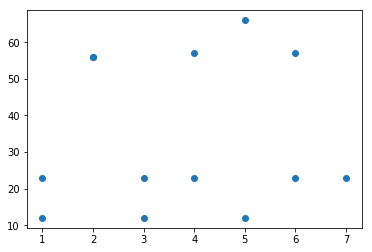

In [32]:
import json
import random

import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from IPython.display import Audio

import sonify
import pygame

%matplotlib inline

simple_data = [(1,12),(1,23),(2,56),(2,56),(3,12),(3,23),(4,57),(4,23),(5,66),(5,12),(6,23),(6,57),(7,23)]
plt.scatter(*zip(*simple_data))

In [37]:
sonify.play_midi_from_data(simple_data)

Done playing!


### Using X as time and Y as note

From a data set we can use the information from each axis to base our sound.
In This case we will use the data of water temperature from a lagoon throughout a period of time.

##### First we define the plot especification and the dataset


In [34]:
def normalize_climate_data(climate_json):
    years = [int(year) for year in climate_json['data'].keys()]
    temp_anomolies = [float(temp_anomaly) for temp_anomaly in climate_json['data'].values()]

    normalized_years = sonify.scale_list_to_range(years, new_min=0, new_max=30)
    normalized_temp_anomolies = sonify.scale_list_to_range(temp_anomolies, new_min=30, new_max=127)


    normed_climate_data = list(zip(normalized_years, normalized_temp_anomolies))
    
    return normed_climate_data

This step we will download a JSON file with temperature data from 1880 to 2019 and save to a folder called "sample_data". Then access the JSON file and use the function to normilize it befor the plot and sound generation.

In [35]:
# Climate data from https://www.ncdc.noaa.gov/cag/
with open('sample_data/1880-2019.json') as data_file:    
    climate_json = json.load(data_file)

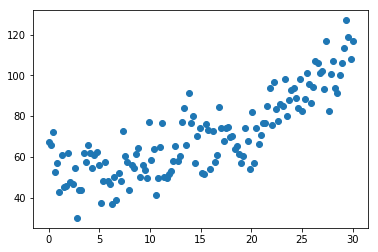

In [36]:
normalized_climate_data = normalize_climate_data(climate_json)
plt.scatter(*zip(*normalized_climate_data))

##### How it sounds like?

In [38]:
sonify.play_midi_from_data(['Pizzicato Strings'] + normalized_climate_data)

Done playing!


We can test other instruments, for example replacing 'pizzicato strings' with 'Trombone','Timpani', etc... A list of instruments can be easily found and is also in the repository at github.

## Troubleshooting

A system and its problems... as we need many different packages to make things work. Some not even realized can take minutes, hours or days.
Here I list the prblems faced during the tests:

##### 1- No MIDI playback
____
Even after had installed the **TiMidity**, I could hear the midi output.  
The cause: **freepats** wasn't installed.  

1 - Install freepats  
2 - Reinstall timidity

### References

[Data into Sound with miditime Library](https://www.revealnews.org/blog/turn-your-data-into-sound-using-our-new-miditime-library/)  
[Python Audio Synthesize from Scrach](https://sidparida.com/category/python-audio-synthesis-from-scratch/)